<a href="https://colab.research.google.com/github/KimManSub/opencv_practice/blob/main/5_%ED%8A%B9%EC%A7%95%EB%A7%A4%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORB(Oriented FAST and Rotated BRIEF) 알고리즘 특징매치

## 필요한 라이브러리 임포트

In [12]:
import cv2  # OpenCV: 이미지 처리와 컴퓨터 비전을 위한 라이브러리
import numpy as np  # NumPy: 행렬 및 수치 연산을 위한 라이브러리
import matplotlib.pyplot as plt  # Matplotlib: 이미지와 데이터를 시각화하는 라이브러리

## Lenna 이미지 다운로드

In [13]:
# wget 명령어를 사용하여 이미지를 URL에서 다운로드하여 'like_lenna.png'라는 이름으로 저장
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png -O like_lenna.png

--2025-01-06 21:08:54--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1462729 (1.4M) [image/png]
Saving to: ‘like_lenna.png’

like_lenna.png      100%[===================>]   1.39M  --.-KB/s    in 0.09s   

2025-01-06 21:08:54 (15.3 MB/s) - ‘like_lenna.png’ saved [1462729/1462729]



## 특징 매칭 함수 정의

In [18]:
def detect_and_match_features(image_path):
    """
    입력 이미지를 읽고 ORB 알고리즘으로 특징점을 검출하며,
    회전된 이미지와의 특징점 매칭을 수행하는 함수

    매개변수:
    - image_path: 입력 이미지 경로
    """
    ### 1. 이미지를 경로로부터 읽기
    # OpenCV를 사용해 이미지를 읽기
    img1 = cv2.imread(image_path)  # 이미지를 컬러 형식으로 읽어오기
    if img1 is None:  # 이미지가 제대로 불러와지지 않으면 종료
        print("이미지를 불러올 수 없습니다. 경로를 확인하세요.")
        return

    ### 2. 이미지 회전하기
    # 이미지를 회전하기 위해 중심점과 각도를 지정
    rows, cols = img1.shape[:2]  # 이미지의 높이와 너비를 가져옵니다.
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    # cols/2, rows/2: 회전 중심 (이미지의 정중앙)
    # 45: 회전 각도 (45도)
    # 1: 확대/축소 비율 (1은 크기 그대로 유지)

    img2 = cv2.warpAffine(img1, M, (cols, rows))  # 회전된 이미지 생성

    ### 3. 이미지 그레이스케일 변환
    # 특징점을 쉽게 찾기 위해 이미지를 흑백(그레이스케일)으로 변환
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # 원본 이미지
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # 회전된 이미지

    ### 4. ORB(Oriented FAST and Rotated BRIEF) 알고리즘 사용
    # ORB는 이미지의 특징점을 찾고 그것을 기술(describe)하는 알고리즘
    orb = cv2.ORB_create(nfeatures=500)
    # nfeatures=500: 최대 500개의 특징점을 찾도록 설정

    # ORB를 사용해 각 이미지에서 특징점(keypoint)과 기술자(descriptor)를 검출
    kp1, des1 = orb.detectAndCompute(gray1, None)  # 원본 이미지
    kp2, des2 = orb.detectAndCompute(gray2, None)  # 회전된 이미지

    ### 5. BFMatcher(Brute-Force Matcher)를 사용해 매칭
    # BFMatcher는 두 이미지의 특징점 기술자를 비교하여 가장 가까운 매칭
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # NORM_HAMMING: ORB 기술자 간 유사성을 비교하는 방식
    # crossCheck=True: 매칭이 양방향으로 일치하는 경우에만 사용

    # 두 이미지의 기술자(des1, des2) 매칭 수행
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    # 매칭 결과를 거리(distance) 기준으로 정렬 (작을수록 더 좋은 매칭)

    ### 6. 매칭 결과 시각화
    # 원본 이미지와 회전된 이미지를 가로로 나란히 배치하고, 매칭된 선을 그림
    result = cv2.drawMatches(
        img1, kp1, img2, kp2, matches[:50], None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    # matches[:50]: 매칭된 점들 중 상위 50개만 그림

    ### 7. 결과 출력
    # 매칭된 특징점 수와 매칭 결과를 출력합니다.
    print(f"원본 이미지 특징점 수: {len(kp1)}")  # 원본 이미지에서 찾은 특징점의 개수
    print(f"회전된 이미지 특징점 수: {len(kp2)}")  # 회전된 이미지에서 찾은 특징점의 개수
    print(f"매칭된 특징점 수: {len(matches)}")  # 매칭된 특징점의 개수

    ### 8. Matplotlib을 사용한 시각화
    plt.figure(figsize=(12, 8))  # 시각화 크기 설정
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))  # OpenCV 이미지를 Matplotlib 형식으로 변환
    plt.title('ORB Feature Matching')  # 그래프 제목
    plt.axis('off')  # 축 제거
    plt.show()

## 이미지 경로 설정

In [19]:
lenna_image = 'like_lenna.png'

## 함수 실행

원본 이미지 특징점 수: 500
회전된 이미지 특징점 수: 500
매칭된 특징점 수: 307


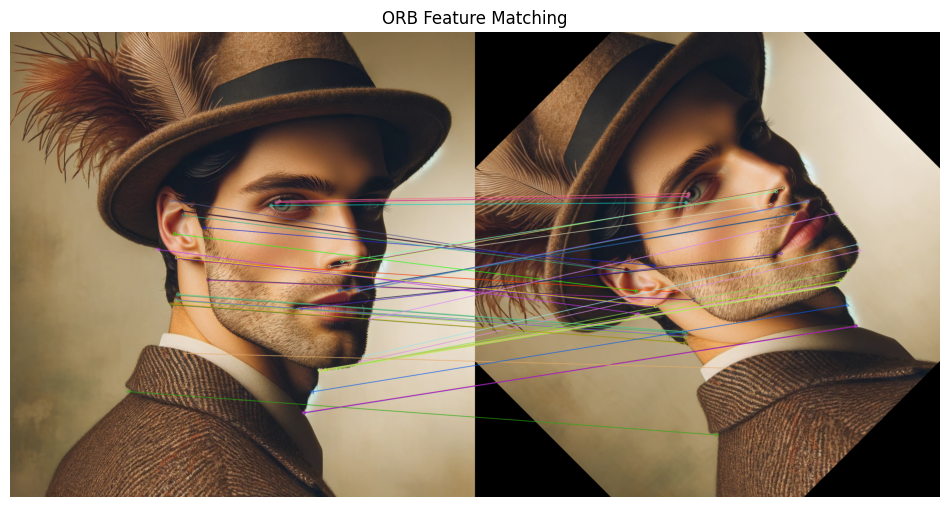

In [20]:
detect_and_match_features(lenna_image)

# SIFT(Scale-Invariant Feature Transform) 알고리즘 특징매치

## 필요한 라이브러리 임포트

In [8]:
import cv2  # OpenCV 라이브러리
import matplotlib.pyplot as plt  # 이미지 시각화를 위한 라이브러리

## Lenna 이미지 다운로드

In [9]:
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png -O like_lenna.png

--2025-01-06 21:01:36--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1462729 (1.4M) [image/png]
Saving to: ‘like_lenna.png’

like_lenna.png      100%[===================>]   1.39M  --.-KB/s    in 0.09s   

2025-01-06 21:01:37 (15.6 MB/s) - ‘like_lenna.png’ saved [1462729/1462729]



## 특징 매칭 함수 정의

In [24]:
def detect_and_match_features_sift(image_path):
    """
    입력 이미지를 읽고 SIFT 알고리즘으로 특징점을 검출하며,
    회전된 이미지와의 특징점 매칭을 수행하는 함수

    매개변수:
    - image_path: 입력 이미지 경로
    """

    # 1. 입력 이미지를 읽어오기
    img1 = cv2.imread(image_path)  # 이미지 파일을 읽어 img1에 저장
    if img1 is None:
        print("이미지를 불러올 수 없습니다. 경로를 확인하세요.")
        return  # 이미지가 제대로 로드되지 않으면 함수 종료

    # 2. 이미지 크기 확인
    rows, cols = img1.shape[:2]  # 이미지의 세로 크기(rows)와 가로 크기(cols)

    # 3. 이미지 회전을 위한 행렬 생성
    # getRotationMatrix2D(center, angle, scale) -> 회전 행렬
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # 이미지를 45도 회전
    img2 = cv2.warpAffine(img1, M, (cols, rows))  # 회전된 이미지 생성

    # 4. 두 이미지 모두 그레이스케일로 변환 (SIFT는 그레이스케일 이미지에서 동작)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # 원본 이미지를 그레이스케일로 변환
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # 회전된 이미지를 그레이스케일로 변환

    # 5. SIFT 특징점 검출기 생성 (최대 500개의 특징점 검출)
    sift = cv2.SIFT_create(nfeatures=500)  # 최대 500개의 특징점만 검출하도록 설정

    # 6. 원본 이미지와 회전된 이미지에서 특징점과 기술자(Descriptors) 추출
    kp1, des1 = sift.detectAndCompute(gray1, None)  # 원본 이미지에서 특징점(kp1)과 기술자(des1) 추출
    kp2, des2 = sift.detectAndCompute(gray2, None)  # 회전된 이미지에서 특징점(kp2)과 기술자(des2) 추출

    # 7. BFMatcher를 사용한 특징점 매칭
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  # L2 거리 기준으로 매칭 (crossCheck=True는 양방향 매칭)
    # L2(유클리드거리)는 유사도 측정 시, 거리 작으면 유사, 크면 다르다고 판단
    matches = bf.match(des1, des2)  # 두 이미지 간 기술자(des1, des2) 매칭
    matches = sorted(matches, key=lambda x: x.distance)  # 매칭된 결과를 거리(distance) 기준으로 정렬

    # 8. 매칭 결과를 이미지로 시각화 (최상위 50개 매칭만 표시)
    result = cv2.drawMatches(
        img1, kp1, img2, kp2, matches[:50], None,  # 매칭된 50개를 이미지로 그리기
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS  # 특징점만 그리기 (매칭된 점은 표시)
    )

    # 9. 매칭된 특징점의 수를 출력
    print(f"SIFT - 원본 이미지 특징점 수: {len(kp1)}")
    print(f"SIFT - 회전된 이미지 특징점 수: {len(kp2)}")
    print(f"SIFT - 매칭된 특징점 수: {len(matches)}")

    # 10. Matplotlib을 사용해 매칭 결과 시각화
    plt.figure(figsize=(20, 6))  # 그림의 크기를 설정
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))  # BGR을 RGB로 변환하여 시각화
    plt.title("SIFT Feature Matching")  # 그래프 제목
    plt.axis("off")  # 축 표시 끄기
    plt.show()  # 매칭 결과 이미지 출력


## 이미지 경로 지정

In [22]:
image_path = "like_lenna.png"  # 여기서 "like_lenna.png"는 사용할 이미지 경로

## 함수 실행

SIFT - 원본 이미지 특징점 수: 501
SIFT - 회전된 이미지 특징점 수: 500
SIFT - 매칭된 특징점 수: 317


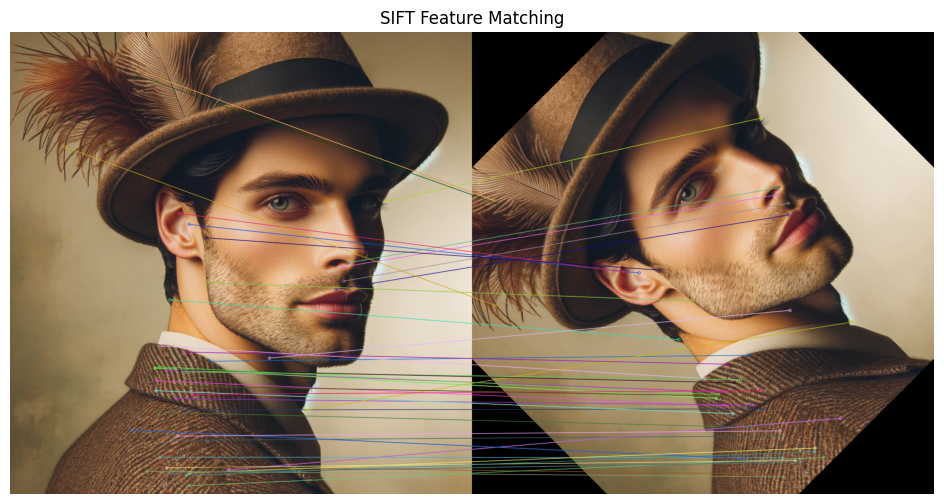

In [25]:
detect_and_match_features_sift(image_path)